Name:   
Matrikelnummer:  
Email:   
   
Name:   
Matrikelnummer:   
Email:

Name:    
Matrikelnummer:    
Email:    

### Note: This assignment will extensively refer to coding exercise in assignment 4.

## 6.2.a Building your own Neural-Network

Import numpy, which is really all we need to create our own NN.

In [1]:
import numpy as np
import torchvision as torchvision
# Remember to Fix your seeds for pytorch and numpy

Recall that our simple neural network consisted of two layers. We also added an `activation` function as a non-linearity to the output of our intermediate layer. Given an input $\mathbf{x} \in \mathbb{R}^n $ we have

$ \mathbf{h} = f^{(1)}(\mathbf{x}; \mathbf{W},c) = activation\_fn(\mathbf{W}^\mathsf{T} \mathbf{x} + c) $ \


$ \mathbf{y} = f^{(2)}(\mathbf{h}; \mathbf{w},b) = \text{softmax}( \mathbf{w}^\mathsf{T} \mathbf{h} + b) $

In this exercise you will create your own network and are free to implement it with your own design choices. However, we will do it in a way that allows you to specify the depth of network, i.e. we extend our network such that there isn't just one $\mathbf{h}$ intermediate layers, but rather $n$ of them $\mathbf{h}_{i}$ with $i \in \{1,..., n\}$

**NOTE**: You are not allowed to use any built-in functions to calculate Leaky_ReLU, Softmax or the forward/backward pass directly.

**NOTE 2**: Remember to include the non-linearity at every layer. Remember to also add the bias to every layer. Finally, remember to apply the softmax in the output layer.

## ToDo: Rewrite the Leaky_ReLu and Softmax function as Class and implement a function in each of them to calculate gradients (1 point)
Remember that in PyTorch, these are implemented as classes so we also want to have them as classes.

In [192]:
class leaky_relu:
    """
    Recall your implementation of relu function in assignment 4 and try to implement
    Leaky_ReLu similarily, but as a class with a function to calculate gradient
    """

    def __init__(self, alpha=0.2):
        self.alpha = alpha
        self.output = None

    def forward(self, x):
        x[x < 0] = x[x < 0] * self.alpha
        self.output = x.copy()  # for backpropagation?
        return x

    def gradient(self, grad):
        assert self.output is not None
        # grad = np.ones(self.output.shape[0], dtype=float)
        # print(grad.shape, self.output.shape)
        grad[self.output >= 0] = 1.0
        grad[self.output < 0] = self.alpha

        return grad

In [198]:
class softmax:
    """
    Recall your implementation of softmax function in assignment 4 and try to implement
    softmax similarily, but as a class with a function to calculate gradient
    """

    def __init__(self):
        self.output = None
        self.input = None

    def forward(self, x):
        self.input = x.copy()
        x = np.exp(x) / (np.exp(x).sum())
        self.output = x.copy()
        return x

    def gradient(self, x):
        N = self.input.shape[0]
        return self.output * (np.eye(N) - self.output.T)

## ToDo: Calculate the gradient using your implemented functions in their respective classes and validate by manually calculating gradients using a toy value. (1 point)

In [199]:
## Solution
input_array = np.array([1.0, 1, 0, -1])

# relu
relu = leaky_relu()
relu_output = relu.forward(input_array)
print('[Relu] output:\n', relu_output)
# gradient
gradient = relu.gradient(np.ones(input_array.shape[0]))
print('[Relu] gradient:\n', gradient)
print('[Relu] expected gradient:', np.array([1, 1, 1, 0.2]))

# # softmax
input_array = np.array([1, 1, 1, -1])
cstm_sftmx = softmax()
softmax_output = cstm_sftmx.forward(input_array)
softmax_gradient = cstm_sftmx.gradient(np.ones(input_array.shape[0]))
print('[Softmax] output:\n', softmax_output)
print('[Softmax] gradient:\n', softmax_gradient)

[Relu] output:
 [ 1.   1.   0.  -0.2]
[Relu] gradient:
 [1.  1.  1.  0.2]
[Relu] expected gradient: [1.  1.  1.  0.2]
[Softmax] output:
 [0.31894516 0.31894516 0.31894516 0.04316453]
[Softmax] gradient:
 [[ 0.21721914 -0.10172601 -0.10172601 -0.00186318]
 [-0.10172601  0.21721914 -0.10172601 -0.00186318]
 [-0.10172601 -0.10172601  0.21721914 -0.00186318]
 [-0.10172601 -0.10172601 -0.10172601  0.04130136]]


## ToDo: Rewrite the code from Assignment 4 to include backpropagation in your class without using pytorch. Remember to use your Leaky_ReLu class here as activation function. (1.5 points)
#### Feel free to refer to your solutions from Assignment 4.

In [200]:
class FFNetwork:
    """
    Class representing the feed-forward neural network
    """

    def __init__(self, input_dim: int, hidden_dim: int,
                 output_dim: int, hidden_size: int, lr: float = 0.01):
        """
        Args:
        input_dim: dimensionality of `x`
        hidden_dim: dimensionality of the intermediate `h_i`
        output_dim: dimensionality of `y`
        hidden_size: number of intermediate layers `h_i`
        """

        ## SOLUTION ##

        self.layers = []

        # first layer
        self.layers.append([np.random.randn(input_dim, hidden_dim), np.zeros(hidden_dim), leaky_relu()])

        # middle layer(s)
        for i in range(hidden_size):
            self.layers.append([np.random.randn(hidden_dim, hidden_dim), np.zeros(hidden_dim), leaky_relu()])

        # last layer
        self.layers.append([np.random.randn(hidden_dim, output_dim), np.zeros(output_dim), softmax()])

        self.res = None
        self.inputs = None

        self.layer_output = []

        self.grads = []
        self.lr = lr

        ## SOLUTION ##

    def forward(self, x):
        """
        Args:
        x: input to the neural network

        Output:
        `y`, i.e. the prediction of the network

        Note: Remember to apply the ReLU and add the bias for each layer
        """
        res = x
        self.inputs = x.copy()

        for W, b, activation in self.layers:
            # res = res @ W + b
            res = np.dot(res, W) + b
            res = activation.forward(res)
            self.layer_output.append(res.copy())


        ## SOLUTION ##
        self.res = np.array(res)  #.reshape((-1, 1))
        return res

    def fit(self, X, Y):
        """

        :param grad: the gradient of the error function
        """

        pred = self.forward(X)

        reversed_list = list(reversed(self.layers))

        delta_matrix = np.zeros((self.res.shape[0], self.res.shape[1]))
        for i in range(self.res.shape[0]):
            delta_matrix[i, Y[i]] = 1

        grad = (self.res - delta_matrix) * (1/self.res.shape[0])


        for i in range(len(reversed_list)):
            W, b, activation = reversed_list[i]

            if i == len(reversed_list)-1:
                layer_input = self.inputs
            else:
                layer_input = np.array(self.layer_output[-(i+2)])

            if i != 0:
                grad = activation.gradient(grad)
            # print(g.shape, grad.shape)


            dW = np.dot(grad.T, layer_input).T
            db = np.dot(grad.T, np.ones(grad.shape[0]))

            grad = np.dot(grad, W.T)

            W -= self.lr * dW
            b -= self.lr * db

np.random.seed(0)

print('NETWORK config:', (2, 3, 2, 1))
network = FFNetwork(2, 3, 2, 1)
X = np.array([1., 0.]).reshape(1, 2)
Y = np.array([0, 1])
network.fit(X, Y)

NETWORK config: (2, 3, 2, 1)


### 6.2.b.2 Training a network for MNIST (1.5 points)

Now that we know how to train a Neural network in Pytorch. Let's start training and evaluating our model using a very standard dataset, for now let's use MNIST. Design a network from scracth using PyTorch and include the followings. Remember that we need to use forward-propagation and backprop.
- Training Loop
- Optimization 
- Evaluating Loop

In [213]:
import torch
import torch.nn.functional as F
import torchvision
from torch import nn

In [214]:
class TorchFFNetwork(nn.Module):
    """
    A pytorch implementation to do classification for MNIST dataset.
    """

    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int, hidden_size: int):
        super().__init__()
        layers = []

        layers.append(nn.Flatten())
        layers.append(nn.Linear(input_dim, hidden_dim, bias=True))
        layers.append(nn.ReLU())
        for i in range(hidden_size-1):
          layers.append(nn.Linear(hidden_dim, hidden_dim, bias=True))
          layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, output_dim))

        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return F.softmax(self.layers.forward(x), dim=1)

In [217]:
LR = 0.001
NUM_EPOCHS = 5
batch_size = 1 # sorry, my laptop says no more

model = TorchFFNetwork(28*28, 50, 2, 1)

optimizer = torch.optim.SGD(lr=LR, params=model.parameters())
criterion = torch.nn.CrossEntropyLoss()


# load the MNIST data, idk if this is a part of the exercise, we can do this by using this pytorch class: https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html
norm_transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='datasets/',
                                          train=False,
                                           transform=norm_transform,
                                          download=True
                                          )

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

for epoch in range(NUM_EPOCHS):

    total_loss = torch.tensor([0.0])

    for step, (batch_x, batch_y) in enumerate(train_loader):
        # training
        optimizer.zero_grad()

        pred = model.forward(batch_x)
        loss = criterion(pred, batch_y)

        loss.backward()
        optimizer.step()

        total_loss += loss
    print('Train error:', total_loss/len(train_loader))

    # test
    with torch.no_grad():
        total_loss = torch.tensor([0.0])
        for step, (batch_x, batch_y) in enumerate(test_loader):

            pred = model.forward(batch_x)
            loss = criterion(pred, batch_y)
            total_loss += loss

    print('Test error:', total_loss/len(test_loader))

### ToDo: Implement functions for Stochastic Gradient Descent and Stochastic Gradient Descent with momentum and plot the difference on how they change the value for gradients. ( 1 + 1 (Bonus))

In [240]:
# what gradients, the one of the model or a new one???
from torch.autograd import Variable

def f(x):
    return (x-1)*(x+2)*(x-20)*(x**2-62)

LR = 1e-9 # very low
NUM_EPOCHS = 1000

x_start = 98.0
y_start = -2.0

# no momentum
x = Variable(torch.tensor([x_start]), requires_grad=True)
y = Variable(torch.tensor([y_start]), requires_grad=True)

optim = torch.optim.SGD(params=[x], lr=LR, momentum=0)

x_history_no_momentum = []
y_history_no_momentum = []
for _ in range(NUM_EPOCHS):
    optim.zero_grad()

    z = f(x)
    z.backward()

    x_history_no_momentum.append(x.item())
    # y_history_no_momentum.append(y.item())

    optim.step()

    # print(x.item())

# WITH momentum
x = Variable(torch.tensor([x_start]), requires_grad=True)
y = Variable(torch.tensor([y_start]), requires_grad=True)

optim = torch.optim.SGD(params=[x], lr=LR, momentum=0.9)

x_history_with_momentum = []
y_history_with_momentum = []
for _ in range(NUM_EPOCHS):
    optim.zero_grad()

    z = f(x)
    z.backward()

    x_history_with_momentum.append(x.item())
    # y_history_with_momentum.append(y.item())

    optim.step()

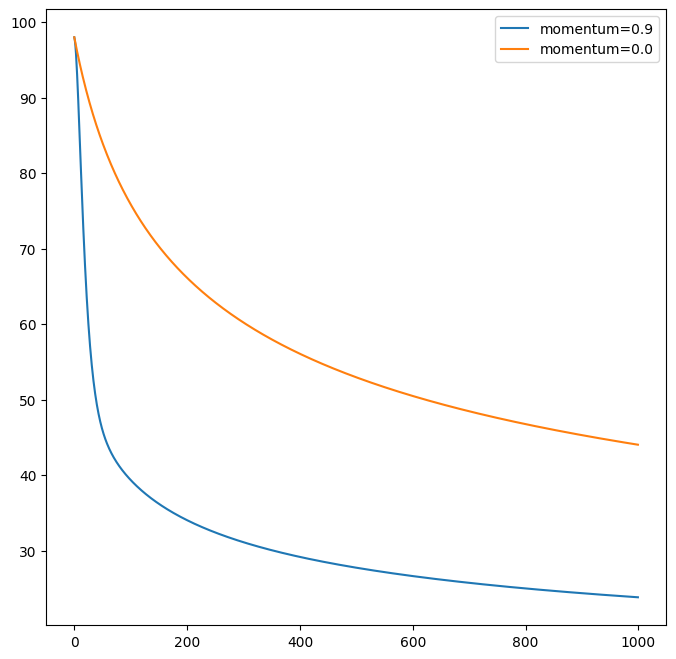

In [241]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

X = list(range(len(x_history_with_momentum)))
ax.plot(X, x_history_with_momentum, label='momentum=0.9')
ax.plot(X, x_history_no_momentum, label='momentum=0.0')
ax.legend()